__Name:__ Amrita Veshin <br>
__Register Number:__ 22122104

----------------------------------------------------------------------------------------------------
#<center>NLP Lab07: Lemmatizing Words Using WordNet
----------------------------------------------------------------------------------------------------


In [ ]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Function to convert POS tags to WordNet format

In [ ]:
def get_wordnet_pos(tag):
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

## Extracting text from a blog online

In [ ]:

# URL of the blog post
url = "https://suvrobemused.blogspot.com/2018/02/devbhoomi.html?m=1"

# Send an HTTP GET request and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Find and extract the textual content of the blog post
text_elements = soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'li', 'a'])
text_content = " ".join([element.get_text() for element in text_elements])


In [ ]:
text_content

"\n\nSuvro Chatterjee bemused\n\n \nSuvro Chatterjee bemused\n A father, teacher, personal counsellor, sometime journalist and reader, I keep reflecting on the world's pageantry, magic, comicality and pain... Monday, February 26, 2018  \nDevbhoomi\n here here little video \nSuvro Chatterjee\n 8:10 pm Share  5 comments: Aveek Mukherjee26 February, 2018 22:24Dear Sir,It will surely be wonderful to go through the pictures of your trip. The post reminded me of my own Haridwar trip, back in 2011, with my family. I have wanted to go there again since then. Right now, after reading this post I can't wait to go uphill through those winding roads, with the cold wind kissing my face. It's breathtaking!Hope you are doing well!With regards,Aveek. ReplyDeleteRepliesReply Aveek Mukherjee 26 February, 2018 22:24 Dear Sir,It will surely be wonderful to go through the pictures of your trip. The post reminded me of my own Haridwar trip, back in 2011, with my family. I have wanted to go there again since

## Tokenizing and Lemmatization

In [ ]:
# Tokenize the text
tokens = word_tokenize(text_content)
tokens

['Suvro',
 'Chatterjee',
 'bemused',
 'Suvro',
 'Chatterjee',
 'bemused',
 'A',
 'father',
 ',',
 'teacher',
 ',',
 'personal',
 'counsellor',
 ',',
 'sometime',
 'journalist',
 'and',
 'reader',
 ',',
 'I',
 'keep',
 'reflecting',
 'on',
 'the',
 'world',
 "'s",
 'pageantry',
 ',',
 'magic',
 ',',
 'comicality',
 'and',
 'pain',
 '...',
 'Monday',
 ',',
 'February',
 '26',
 ',',
 '2018',
 'Devbhoomi',
 'here',
 'here',
 'little',
 'video',
 'Suvro',
 'Chatterjee',
 '8:10',
 'pm',
 'Share',
 '5',
 'comments',
 ':',
 'Aveek',
 'Mukherjee26',
 'February',
 ',',
 '2018',
 '22:24Dear',
 'Sir',
 ',',
 'It',
 'will',
 'surely',
 'be',
 'wonderful',
 'to',
 'go',
 'through',
 'the',
 'pictures',
 'of',
 'your',
 'trip',
 '.',
 'The',
 'post',
 'reminded',
 'me',
 'of',
 'my',
 'own',
 'Haridwar',
 'trip',
 ',',
 'back',
 'in',
 '2011',
 ',',
 'with',
 'my',
 'family',
 '.',
 'I',
 'have',
 'wanted',
 'to',
 'go',
 'there',
 'again',
 'since',
 'then',
 '.',
 'Right',
 'now',
 ',',
 'after',
 

In [ ]:

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens, excluding stopwords and punctuation
lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in nltk.pos_tag(tokens) if word.lower() not in stopwords.words('english') and word.isalpha()]


In [ ]:
lemmatized_words

['Suvro',
 'Chatterjee',
 'bemuse',
 'Suvro',
 'Chatterjee',
 'bemuse',
 'father',
 'teacher',
 'personal',
 'counsellor',
 'sometime',
 'journalist',
 'reader',
 'keep',
 'reflect',
 'world',
 'pageantry',
 'magic',
 'comicality',
 'pain',
 'Monday',
 'February',
 'Devbhoomi',
 'little',
 'video',
 'Suvro',
 'Chatterjee',
 'pm',
 'Share',
 'comment',
 'Aveek',
 'February',
 'Sir',
 'surely',
 'wonderful',
 'go',
 'picture',
 'trip',
 'post',
 'remind',
 'Haridwar',
 'trip',
 'back',
 'family',
 'want',
 'go',
 'since',
 'Right',
 'read',
 'post',
 'ca',
 'wait',
 'go',
 'uphill',
 'wind',
 'road',
 'cold',
 'wind',
 'kiss',
 'face',
 'breathtaking',
 'Hope',
 'well',
 'regard',
 'Aveek',
 'ReplyDeleteRepliesReply',
 'Aveek',
 'Mukherjee',
 'February',
 'Dear',
 'Sir',
 'surely',
 'wonderful',
 'go',
 'picture',
 'trip',
 'post',
 'remind',
 'Haridwar',
 'trip',
 'back',
 'family',
 'want',
 'go',
 'since',
 'Right',
 'read',
 'post',
 'ca',
 'wait',
 'go',
 'uphill',
 'wind',
 'road',

## Getting Insights from the Lemmatized Words

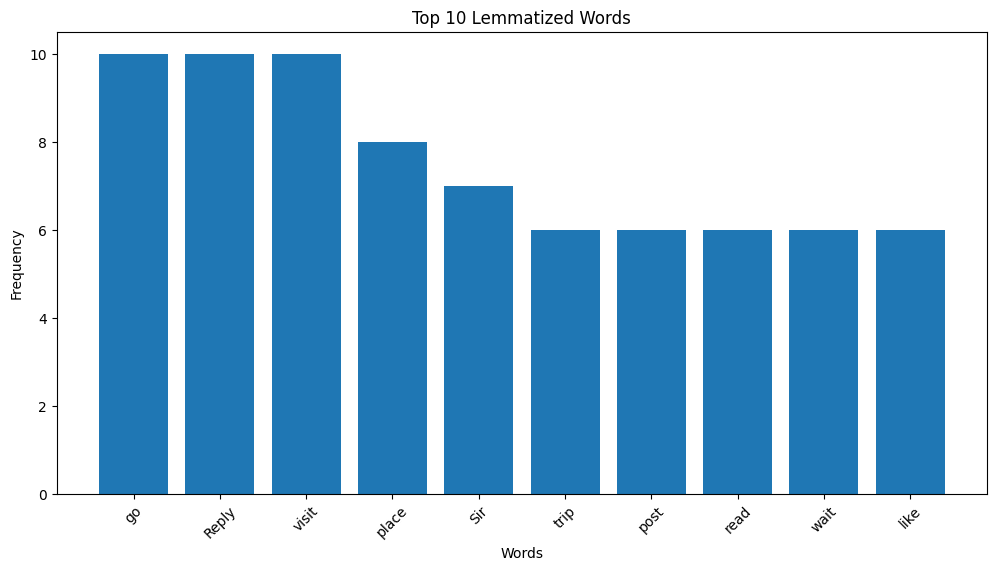

Lemmatized Words:
['Suvro', 'Chatterjee', 'bemuse', 'Suvro', 'Chatterjee', 'bemuse', 'father', 'teacher', 'personal', 'counsellor', 'sometime', 'journalist', 'reader', 'keep', 'reflect', 'world', 'pageantry', 'magic', 'comicality', 'pain', 'Monday', 'February', 'Devbhoomi', 'little', 'video', 'Suvro', 'Chatterjee', 'pm', 'Share', 'comment', 'Aveek', 'February', 'Sir', 'surely', 'wonderful', 'go', 'picture', 'trip', 'post', 'remind', 'Haridwar', 'trip', 'back', 'family', 'want', 'go', 'since', 'Right', 'read', 'post', 'ca', 'wait', 'go', 'uphill', 'wind', 'road', 'cold', 'wind', 'kiss', 'face', 'breathtaking', 'Hope', 'well', 'regard', 'Aveek', 'ReplyDeleteRepliesReply', 'Aveek', 'Mukherjee', 'February', 'Dear', 'Sir', 'surely', 'wonderful', 'go', 'picture', 'trip', 'post', 'remind', 'Haridwar', 'trip', 'back', 'family', 'want', 'go', 'since', 'Right', 'read', 'post', 'ca', 'wait', 'go', 'uphill', 'wind', 'road', 'cold', 'wind', 'kiss', 'face', 'breathtaking', 'Hope', 'well', 'regard', 

In [ ]:
# Count word frequency
word_freq = Counter(lemmatized_words)
top_words = word_freq.most_common(10)

# Create a bar chart to visualize top lemmatized words
x, y = zip(*top_words)
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.title("Top 10 Lemmatized Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Print the lemmatized words
print("Lemmatized Words:")
print(lemmatized_words)

## Inferences:

Lemmatization, as a natural language processing technique, aids in identifying key concepts within a specified blog in several ways. Here are some key inferences on how lemmatization can assist in this context:

1. **Reduction of Variance:** Lemmatization reduces words to their base or dictionary form. This simplification helps in consolidating different word forms of the same concept, reducing variance in the text. For example, "running," "ran," and "runs" all become "run."

2. **Enhanced Analysis:** Lemmatized text is more amenable to analysis as it standardizes words. This enables easier extraction of essential keywords and phrases.

3. **Improved Keyword Extraction:** Identifying key concepts often relies on extracting important keywords. Lemmatization ensures that relevant keywords are consistently identified. For example, "cars" and "car" would both be lemmatized to "car."

4. **Topic Modeling:** Lemmatization is commonly used in topic modeling algorithms such as Latent Dirichlet Allocation (LDA) to identify central topics within the content. It helps in grouping similar concepts together.

5. **Elimination of Noise:** By removing common word endings and forms, lemmatization can eliminate noise from the text. Common words such as "the," "and," and "in" are often removed as they do not contribute to key concepts.

6. **Identification of Noun Phrases:** Lemmatization is useful in identifying noun phrases, which often represent key concepts or entities in the text. For instance, "high-performance cars" would be simplified to "high-performance car."

7. **Simplification of Analysis:** Lemmatization simplifies the analysis process, making it more efficient and accurate. It reduces the complexity of dealing with inflected and variant forms of words.

8. **Improved Clustering:** In techniques like hierarchical or k-means clustering, lemmatized text can be more effectively grouped into clusters based on semantic similarity.

9. **Effective Sentiment Analysis:** When identifying key concepts related to sentiments or opinions, lemmatization helps in capturing the sentiment-bearing words accurately. For instance, "amazing" and "amazes" become "amaze," which simplifies sentiment analysis.

10. **Cross-Document Comparison:** Lemmatization facilitates the comparison of key concepts across different documents. It helps ensure that the same concept is represented consistently in different texts.

Lemmatization streamlines and enhances the process of identifying key concepts in a specified blog by reducing textual variation, improving keyword extraction, and making the text more amenable to various NLP techniques. It is a valuable preprocessing step in many natural language processing tasks, especially for text analysis and content understanding.